# **Text Classification using LSTM: Spam or Ham**

1. Introduction
      
      This project aims to classify text messages as either spam or ham (non-spam) using a Long Short-Term Memory (LSTM) neural network. LSTM networks are well-suited for sequential data and can capture long-range dependencies, making them ideal for text classification tasks.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Dataset**
The dataset consists of labeled text messages. Each message is labeled as either "spam" or "ham." The dataset is preprocessed to remove noise, convert text to lowercase, and tokenize the words.

In [2]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.rename({'v1':'label','v2':'text'},axis=1,inplace=True)

Visulaization of data

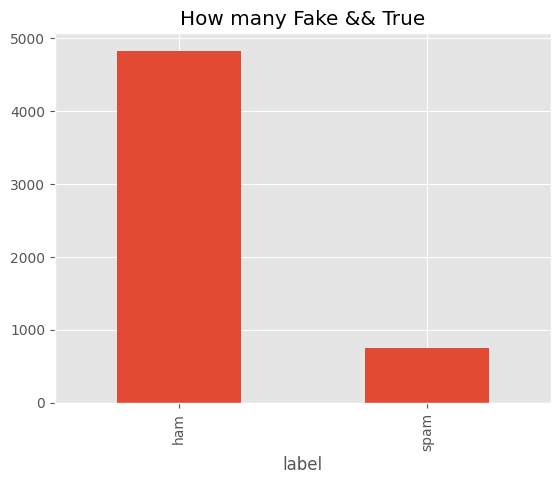

In [6]:
plt.style.use('ggplot')
data['label'].value_counts().plot(kind='bar')
plt.title('How many Fake && True')
plt.show()

# **Data Preprocessing**
Text Cleaning: Remove special characters, punctuation, and numbers.
Tokenization: Convert text into a sequence of tokens (words).
Padding: Ensure all sequences have the same length by padding shorter sequences.
Label Encoding: Convert labels ("spam" or "ham") to binary values.

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
# Example
a = ['ham','spam','netural']
encoder.fit_transform(data['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [9]:
y = encoder.fit_transform(data['label'])
y = y.reshape(-1,1)

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Conv2D,Dense,Embedding,Flatten,Dropout

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

In [12]:
max_len = max(len(seq) for seq in sequences)
print(max_len)

189


In [13]:
sequences_data = pad_sequences(sequences, maxlen=max_len,padding='pre')
X = sequences_data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
total_words = 1000

# **Model Architecture**
The LSTM model consists of the following layers:

Embedding Layer: Converts words into dense vectors.
LSTM Layer: Captures sequential dependencies in the text.
Dense Layer: Fully connected layer with ReLU activation.
Output Layer: Sigmoid activation for binary classification.

In [16]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_len - 1))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(150))  
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None,max_len-1))


# **Training**
1. Loss Function: Binary Crossentropy.
2. Optimizer: Adam.
3. Metrics: Accuracy.

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 188, 100)       │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 188, 150)       │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 188, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,351 (1.65 MB)

 Trainable params: 431,351 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.1,validation_data=(X_test,y_test))

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - Accuracy: 0.9057 - loss: 0.2822 - val_Accuracy: 0.9777 - val_loss: 0.0826
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - Accuracy: 0.9917 - loss: 0.0353 - val_Accuracy: 0.9831 - val_loss: 0.0670
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - Accuracy: 0.9966 - loss: 0.0169 - val_Accuracy: 0.9815 - val_loss: 0.0715
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - Accuracy: 0.9982 - loss: 0.0097 - val_Accuracy: 0.9831 - val_loss: 0.1003
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - Accuracy: 0.9985 - loss: 0.0094 - val_Accuracy: 0.9821 - val_loss: 0.0835
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - Accuracy: 0.9989 - loss: 0.0048 - val_Accuracy: 0.9793 - val_loss: 0.1134
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - Accuracy: 0.9985 - loss: 0.0079 - val_Accuracy: 0.9821 - val_loss: 0.1113
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - Accuracy: 0.9963 - loss: 0.0101 - val_Accu

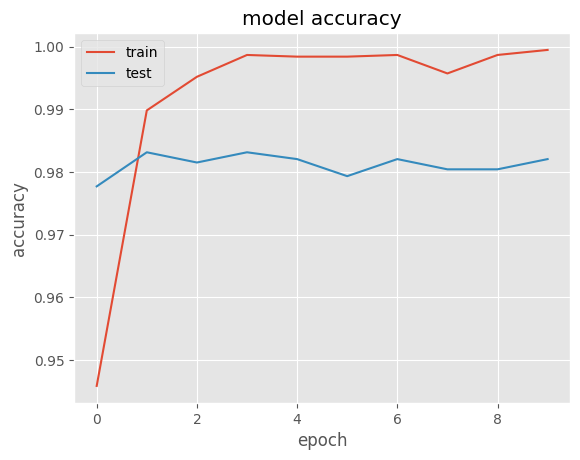

In [19]:
plt.plot(model.history.history['Accuracy'])
plt.plot(model.history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

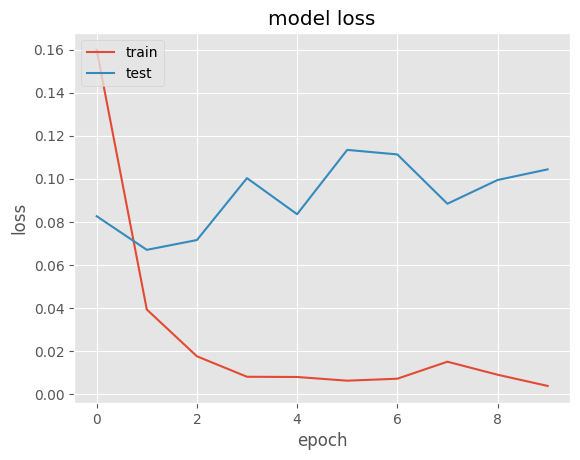

In [20]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
#

In [21]:
y_pred = model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [22]:
loss,accuracy = model.evaluate(X_test,y_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Accuracy: 0.9806 - loss: 0.1149


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred.round(),y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1608
         1.0       0.89      0.97      0.93       231

    accuracy                           0.98      1839
   macro avg       0.94      0.98      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [24]:
print(confusion_matrix(y_test,y_pred.round()))

[[1581    6]
 [  27  225]]


### Here's a breakdown of the confusion matrix:
[[1581    6]
 [  29  223]]

True Positives (TP): 1575

The model correctly predicted 1575 instances as "ham" (not spam).
False Positives (FP):6

The model incorrectly predicted 12 instances as "spam" when they were actually "ham".
False Negatives (FN): 29

The model incorrectly predicted 20 instances as "ham" when they were actually "spam".
True Negatives (TN): 223

The model correctly predicted 232 instances as "spam".

In [25]:
# model.save('model.h5')

In [26]:
def predict(text):
    text = text.lower()
    tokenize = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([tokenize],maxlen=max_len-1,padding='pre')
    predicted = model.predict(token_list,verbose=0)
    print(predicted)
    predicted = np.argmax(predicted,axis=1)
    if  predicted > 0.5:
        print('Spam')
    else:
        print('ham')
    return predicted

# **Conclusion**
The LSTM-based model successfully classifies text messages as spam or ham with high accuracy. This approach can be extended to other text classification tasks with minor adjustments.

In [27]:
data['text'][0]
text = 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat'
a = predict(text)

[[0.00020059]]
ham
